In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

## Método de Runge-Kutta-Fehlberg

### Rubrica
|Elemento |Pts.|
|---|---|
|Lee valor de h y extremo final del intervalo |2|
|Presenta los valores iniciales por RK4 y son correctos |3|
|Presenta tabla con estimaciones, predicción-corrección |3|
|Permite volver a ejecutar y cambiar valores iniciales |1|
|La interfaz es amigable y clara |1|


In [58]:
class AdBaMo(object):

    # Encabezados
    headerRK4=list(("t","x/y","k1","k2","k3","k4"))
    headerABM=list(("t","x/y Pred", "f(x,y) Pred","x/y Corr", "f(x,y) Corr"))
    # header=list(("x","y","k1","k2","k3","k4","Error",""))

    # Constructor
    def __init__(self, initialValue:list, point:float, h_value:float, eqx:str="0", eqy="0") -> None:
        self._initialValue = initialValue
        self.h_value = h_value
        self.solTab = np.zeros((2,6),dtype=float)
        self.solTabABM = np.empty((2,5), dtype=float)
        self.point = point
        self.eqx = eqx
        self.eqy = eqy

    # Lo que muestra al llamar la función print
    def __str__(self) -> str:
        self.rkmMethod()
        return "Objeto de tipo Método Runge-Kutta"

    # Método de Runge-Kutta-4
    def rk4(self):
        self.firstRowOrder4()
        self.iterationsOrder4()
        self.adBaMo()
        #return pd.DataFrame(self.solTab, columns=self.headerRK4)
        return [pd.DataFrame(self.solTab, columns=self.headerRK4),pd.DataFrame(self.solTabABM, columns=self.headerABM).drop([0,1])]

    # Método para crear la primera iteración de RK4
    def firstRowOrder4(self)->None:
        t,x,y = self._initialValue[0], self._initialValue[1], self._initialValue[2]
        self.solTab[0,0] = t
        self.solTab[1,0] = t
        self.solTab[0,1] = x
        self.solTab[1,1] = y
        #k1
        self.solTab[0,2] = self.k1x(t,x,y)
        self.solTab[1,2] = self.k1y(t,x,y)
        #k2
        self.solTab[0,3] = self.k2x(t,x,y,self.solTab[0,2],self.solTab[1,2])
        self.solTab[1,3] = self.k2y(t,x,y,self.solTab[0,2],self.solTab[1,2])
        #k3
        self.solTab[0,4] = self.k3x(t,x,y,self.solTab[0,3],self.solTab[1,3])
        self.solTab[1,4] = self.k3y(t,x,y,self.solTab[0,3],self.solTab[1,3])
        #k4
        self.solTab[0,5] = self.k4x(t,x,y,self.solTab[0,4],self.solTab[1,4])
        self.solTab[1,5] = self.k4y(t,x,y,self.solTab[0,4],self.solTab[1,4])

    # Método para crear el resto de las iteraciones de RK4
    def iterationsOrder4(self:float):
        #rango = int(np.abs((self._initialValue[0]-self.point)/self.h_value))
        t,x,y=0,0,0
        for i in range(0,3):
            un = np.zeros(shape=(2,6))
            t = self.solTab[2*i,0] + self.h_value
            x = self.solTab[2*i,1]
            y = self.solTab[2*i+1, 1]
            #Relleno de siguiente iteracion
            un[0,0] = t
            un[1,0] = t
            un[0,1] = self.get_u(u=x, k1=self.solTab[2*i,2], k2=self.solTab[2*i,3], k3=self.solTab[2*i,4], k4=self.solTab[2*i,5])
            un[1,1] = self.get_u(u=y, k1=self.solTab[2*i+1,2], k2=self.solTab[2*i+1,3], k3=self.solTab[2*i+1,4], k4=self.solTab[2*i+1,5])
            x = un[0,1]
            y = un[1,1]
            #k1
            un[0,2] = self.k1x(t,x,y)
            un[1,2] = self.k1y(t,x,y)
            #k2
            un[0,3] = self.k2x(t,x,y,un[0,2],un[1,2])
            un[1,3] = self.k2y(t,x,y,un[0,2],un[1,2])
            #k3
            un[0,4] = self.k3x(t,x,y,un[0,3],un[1,3])
            un[1,4] = self.k3y(t,x,y,un[0,3],un[1,3])
            #k4
            un[0,5] = self.k4x(t,x,y,un[0,4],un[1,4])
            un[1,5] = self.k4y(t,x,y,un[0,4],un[1,4])
            self.solTab = np.append(self.solTab,un, axis=0)
            del un,t,x,y

    # Métodos para obtener las k de x
    def k1x(self, t:float, x:float, y:float) -> float:
        return self.fx(t,x,y)

    def k2x(self, t:float, x:float, y:float, k1x:float, k1y:float) -> float:
        return self.fx(t + self.h_value/2, x + k1x * self.h_value /2, y + k1y * self.h_value /2)

    def k3x(self, t:float, x:float, y:float, k2x:float, k2y:float)-> float:
        return self.fx(t + self.h_value/2, x + k2x * self.h_value /2, y + k2y * self.h_value /2)

    def k4x(self, t:float, x:float, y:float, k3x:float, k3y:float)-> float:
        return self.fx(t + self.h_value, x + k3x * self.h_value, y + k3y * self.h_value )

    #Métodos para obtener las k de y
    def k1y(self, t:float, x:float, y:float) -> float:
        return self.fy(t,x,y)

    def k2y(self, t:float, x:float, y:float, k1x:float, k1y:float) -> float:
        return self.fy(t + self.h_value/2, x + k1x * self.h_value /2, y + k1y * self.h_value /2)

    def k3y(self, t:float, x:float, y:float, k2x:float, k2y:float)-> float:
        return self.fy(t + self.h_value/2, x + k2x * self.h_value /2, y + k2y * self.h_value /2)

    def k4y(self, t:float, x:float, y:float, k3x:float, k3y:float)-> float:
        return self.fy(t + self.h_value, x + k3x * self.h_value, y + k3y * self.h_value )

    #Siguiente valor de x y de y
    def get_u(self,u:float, k1:float, k2:float, k3:float, k4:float)->float:
        """Return the next y with a global error of O(h^3)"""
        return u + (k1 + 2 * k2 + 2 * k3 + k4) * self.h_value/6


    # Esta función recibirá una cadena que representará la función, usaremos la función "eval"
    def fx(self, t:float, x:float, y:float)->float:
        """This is the equation we want to get the numeric solution"""
        # Notita: las variables x, y si se ocupan ¡aunque no lo parezca!
        return eval(self.eqx)

    def fy(self, t:float, x:float, y:float)->float:
        return eval(self.eqy)

    #--------------------------------------------
    #Iteraciones Adams-Bashforth-Moulton
    def adBaMo(self)->None:
        t=self.solTab[7,0]+self.h_value
        xCor=self.solTab[6,1]
        yCor=self.solTab[7,1]
        fxAnteriores=[self.solTab[0,2],self.solTab[2,2],self.solTab[4,2],self.solTab[6,2]]
        fyAnteriores=[self.solTab[1,2],self.solTab[3,2],self.solTab[5,2],self.solTab[7,2]]
        while(t<=self.point):
            xPred = self.u_pred(xCor,fxAnteriores)
            yPred = self.u_pred(yCor,fyAnteriores)
            fxPred = self.fx(t,xPred,yPred)
            fyPred = self.fy(t,xPred,yPred)
            xCor = self.u_cor(xCor, fxPred, fxAnteriores)
            yCor = self.u_cor(yCor, fyPred, fyAnteriores)
            fxCor = self.fx(t,xCor,yCor)
            fyCor = self.fy(t,xCor,yCor)
            #fila = np.zeros(shape=(2,5))
            fila = [[t,xPred,fxPred,xCor,fxCor],
                    [t,yPred,fyPred,yCor,fyCor]]
            self.solTabABM = np.append(self.solTabABM,fila,axis=0)
            fxAnteriores.pop(0)
            fxAnteriores.append(fxCor)
            fyAnteriores.pop(0)
            fyAnteriores.append(fyCor)
            t=t+self.h_value
    
    def u_pred(self, u:float, fAnt:list):
        return u + self.h_value/24 * (55*fAnt[3]-59*fAnt[2]+37*fAnt[1]-9*fAnt[0])

    def u_cor(self, u:float, fPred:float, fAnt:list):
        return u + self.h_value/24 * (9*fPred+19*fAnt[3]-5*fAnt[2]+fAnt[1])

# Metodo Runge-Kutta 4o orden

`point` es el punto final al que llega `t`

In [62]:
tabs = AdBaMo(initialValue=(0,0,1), point=2,h_value=0.05, eqx="x*y+t", eqy="x-t").rk4()
tabs[0]

,t,x/y,k1,k2,k3,k4
0,0.00,0.000000,0.000000,0.025000,0.025625,0.051280
1,0.00,1.000000,0.000000,-0.025000,-0.024375,-0.048719
2,0.05,0.001271,0.051270,0.077547,0.078200,0.105156
3,0.05,0.998771,-0.048729,-0.072447,-0.071790,-0.094819
4,0.10,0.005170,0.105145,0.132743,0.133423,0.161715
5,0.10,0.995171,-0.094830,-0.117201,-0.116511,-0.138158
6,0.15,0.011830,0.161704,0.190649,0.191354,0.221000
7,0.15,0.989334,-0.138170,-0.159127,-0.158403,-0.178602


#Metodo Adams-Bashforth-Moulton

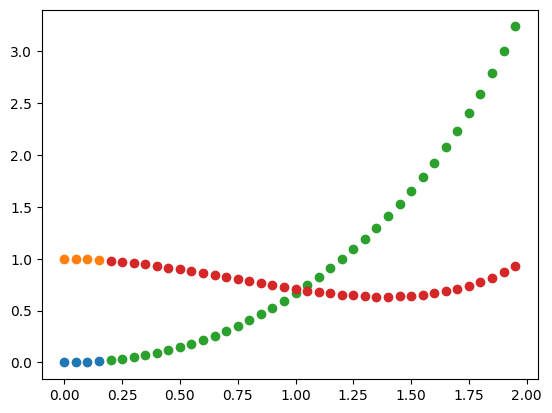

: 

In [63]:
plt.scatter(tabs[0][tabs[0].index %2 == 0][['t']],tabs[0][tabs[0].index %2 == 0][['x/y']])
plt.scatter(tabs[0][tabs[0].index %2 == 1][['t']],tabs[0][tabs[0].index %2 == 1][['x/y']])
plt.scatter(tabs[1][tabs[1].index %2 == 0][['t']],tabs[1][tabs[1].index %2 == 0][['x/y Corr']])
plt.scatter(tabs[1][tabs[1].index %2 == 1][['t']],tabs[1][tabs[1].index %2 == 1][['x/y Corr']])

In [61]:
tabs[1]

,t,x/y Pred,"f(x,y) Pred",x/y Corr,"f(x,y) Corr"
2,0.20,0.021387,0.220989,0.021386,0.220988
3,0.20,0.981402,-0.178613,0.981402,-0.178614
4,0.25,0.033975,0.283008,0.033975,0.283007
5,0.25,0.971523,-0.216025,0.971523,-0.216025
6,0.30,0.049733,0.347736,0.049732,0.347735
7,0.30,0.959853,-0.250267,0.959853,-0.250268
8,0.35,0.068793,0.415116,0.068792,0.415116
9,0.35,0.946552,-0.281207,0.946552,-0.281208
10,0.40,0.091287,0.485060,0.091286,0.485060
11,0.40,0.931789,-0.308713,0.931789,-0.308714
